In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This notebook should be run under "scripts/"

import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from BusinessAnalyticsProject.dataset.feature_engineering import train_test_split
from BusinessAnalyticsProject.models.model_selection import (
    create_pipeline,
    hyperparam_tuning,
    metrics,
    benchmark
)
from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG
from BusinessAnalyticsProject.models.model_interpretation import (
    create_benchmark_plot,
    create_feature_importance_plot
)

In [4]:
sns.set_theme()

## Read in Features

In [5]:
all_train_df = pd.read_csv("../data/processed/all_train.csv", index_col=[0], parse_dates=["Date"])
all_test_df = pd.read_csv("../data/processed/all_test.csv", index_col=[0], parse_dates=["Date"])

X_train, y_train, weights_train, X_test, y_test, weights_test = train_test_split(all_train_df)
X_train.shape, y_train.shape, weights_train.shape, X_test.shape, y_test.shape, weights_test.shape

((294132, 15), (294132,), (294132,), (127438, 15), (127438,), (127438,))

## Benchmark: WLS

In [6]:
pipeline_data = create_pipeline(
    None,
    None,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD12517C70>),
                                ('continuous',
                                 Pipeline(steps=[('dummy',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function identity at 0x000001AD7FDFD040>))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD12517490>)])

In [7]:
results, metrics_val = benchmark(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.543
Model:                            WLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     3570.
Date:                Sat, 16 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:36:31   Log-Likelihood:            -3.4168e+06
No. Observations:              294132   AIC:                         6.834e+06
Df Residuals:                  294033   BIC:                         6.835e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                        3619.4744    299.195     12.097      0.000    3033.060    4205.889
categorical__Dept_1          6234.9846    309.928     20.118      0.000    5627.534    6842.435
categorical__Dept_2          2.873e+04    309.928     92.686      0.000    2.81e+04    2.93e+04
categorical__Dept_3         -2055.0445    309.928     -6.631      0.000   -2662.495   -1447.594
categorical__Dept_4          1.289e+04    309.928     41.590      0.000    1.23e+04    1.35e+04
categorical__Dept_5          1.791e+04    312.121     57.384      0.000    1.73e+04    1.85e+04
categorical__Dept_6         -6370.7950    316.917    -20.102      0.000   -6991.944   -5749.646
categorical__Dept_7          1.764e+04    309.928     56.930      0.000     1.7e+04    1.83e+04
categorical__Dept_8           1.61e+04    309.928     51.932      0.000    1.55e+04    1.67e+04
categorical__Dept_9          5578.6118    312.622     17.845      0.000    4965.881    6191.343
categorical__Dept_10         4767.3661    309.928     15.382      0.000    4159.916    5374.816
categorical__Dept_11          957.7007    309.936      3.090      0.002     350.234    1565.168
categorical__Dept_12        -9691.5806    310.559    -31.207      0.000   -1.03e+04   -9082.895
categorical__Dept_13         1.661e+04    309.928     53.583      0.000     1.6e+04    1.72e+04
categorical__Dept_14         5759.4362    309.928     18.583      0.000    5151.986    6366.886
categorical__Dept_16        -4755.3760    309.928    -15.343      0.000   -5362.826   -4147.926
categorical__Dept_17        -2116.1603    309.945     -6.828      0.000   -2723.643   -1508.677
categorical__Dept_18        -1267.6636    321.585     -3.942      0.000   -1897.960    -637.367
categorical__Dept_19        -1.428e+04    366.752    -38.940      0.000    -1.5e+04   -1.36e+04
categorical__Dept_20        -8540.4807    320.189    -26.673      0.000   -9168.043   -7912.919
categorical__Dept_21        -8166.3316    309.928    -26.349      0.000   -8773.782   -7558.881
categorical__Dept_22        -2159.2644    328.387     -6.575      0.000   -2802.894   -1515.635
categorical__Dept_23         1.036e+04    325.132     31.849      0.000    9717.903     1.1e+04
categorical__Dept_24        -8383.5122    331.214    -25.311      0.000   -9032.682   -7734.343
categorical__Dept_25        -4480.2534    311.029    -14.405      0.000   -5089.862   -3870.645
categorical__Dept_26        -6360.6088    323.413    -19.667      0.000   -6994.489   -5726.728
categorical__Dept_27         -1.34e+04    328.493    -40.790      0.000    -1.4e+04   -1.28e+04
categorical__Dept_28        -1.327e+04    315.374    -42.086      0.000   -1.39e+04   -1.27e+04
categorical__Dept_29        -9452.5378    333.223    -28.367      0.000   -1.01e+04   -8799.430
categorical

In [8]:
metrics_val

{'r2_score': 0.5812441068564221,
 'rmse': 14314.446167508742,
 'rwmse': 5588188.544246499}

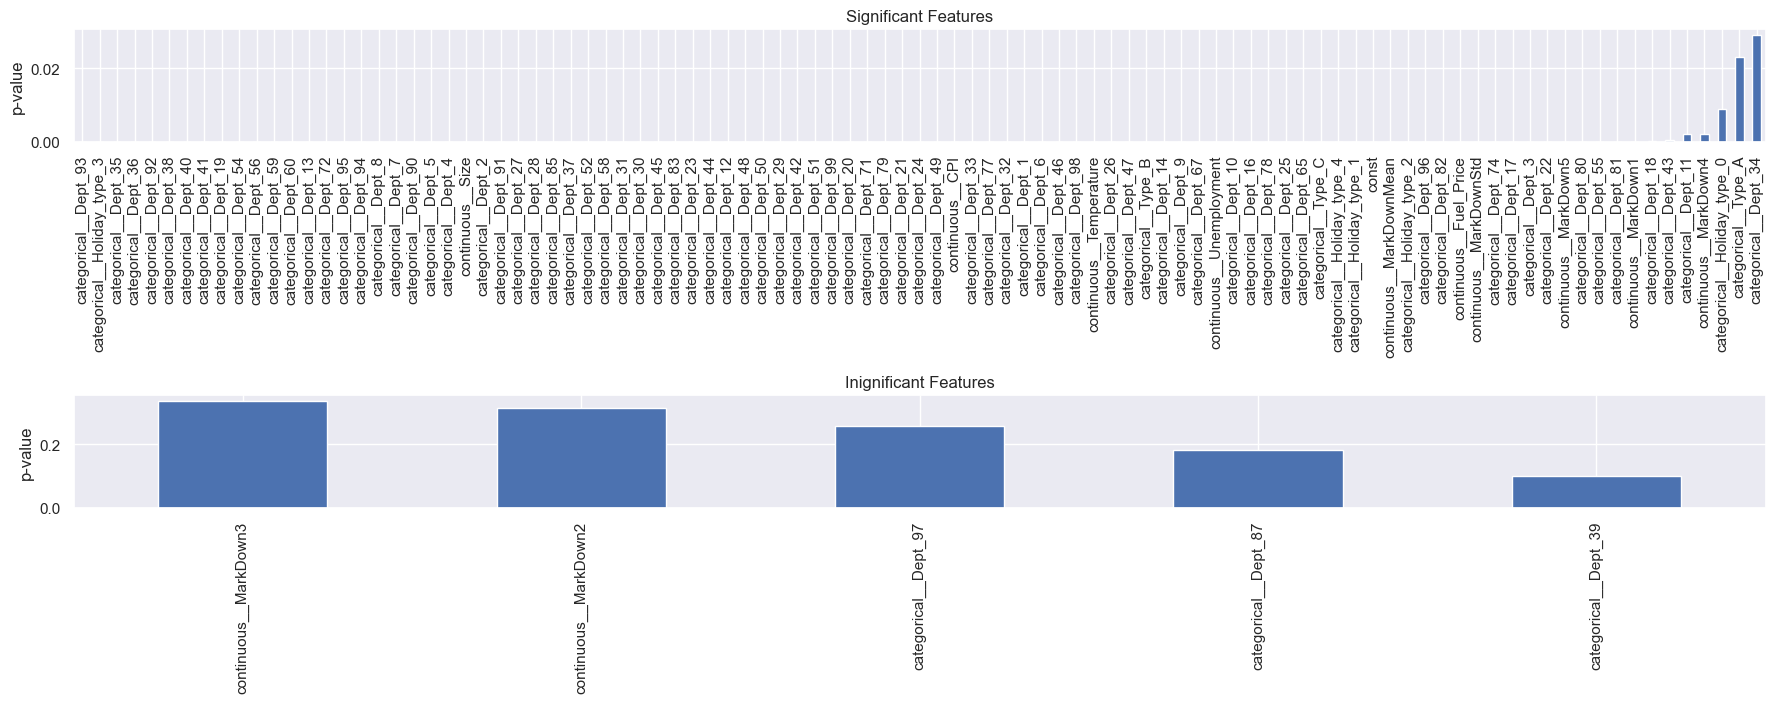

In [9]:
fig, axes = create_benchmark_plot(results)

## Hyperparamter Tuning for ML Models

1. Register a new model by creating a configuration file under ```configs/```. For example, ```RegressionForestRegressor``` is registered by creating ```configs/RF.py```
    1. You need to create ```CONFIG``` dict with the same keys
    1. Then fill in the model class, default parameters and parameter search space
    1. Import the ```CONFIG``` dict by ```from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG```

1. Create a pipeline using ```create_pipeline(.)```. You can specify whether to 
    - use winsorization (cutting extreme quantiles like < 2% and > 98%), 
    - use data normalization (StandardScalar()) and/or 
    - do one-hot encoding for categorical columns.
1. Run hyperparameter tuning using ```hyperparam_tuning(.)```
    1. You need to specify a ```save_dir``` directory. The refitted best model, all metrics ($R^2$, RMSE and WRMSE(Weighted RMSE)) and cross-validation results are saved in the ```save_dir```.

In [10]:
# Step 1
RF_CONFIG  ## Load your model configuaration dict

{'model_cls': sklearn.ensemble._forest.RandomForestRegressor,
 'params': {'n_estimators': 100, 'max_depth': 5, 'verbose': 1, 'n_jobs': 5},
 'param_space': {'n_estimators': [2, 5, 10, 50, 75],
  'max_depth': [None, 3, 5, 7],
  'min_samples_split': [2, 5, 10, 20],
  'min_samples_leaf': [1, 2, 5, 10, 20],
  'max_features': [None, 'sqrt', 'log2', 1.0]}}

In [11]:
# Step 2
pipeline = create_pipeline(
    RF_CONFIG["model_cls"],
    RF_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=False,
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CE20>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001AD7FDFD040>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AD1ED5CB20>)])),
                ('model',
                 RandomForestRegressor(max_depth=5, n_jobs=5, verbose=1))])

In [12]:
# Step 3
opt, metrics_val = hyperparam_tuning(
    pipeline,
    RF_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/RF/"  ## Change to your save_dir
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  2.6min
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:  4.9min finished
[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  75 out of  75 | elapsed:    0.3s finished


In [13]:
metrics_val

{'r2_score': 0.9045832968353674,
 'rmse': 6832.919229547928,
 'rwmse': 2682864.9460593406}

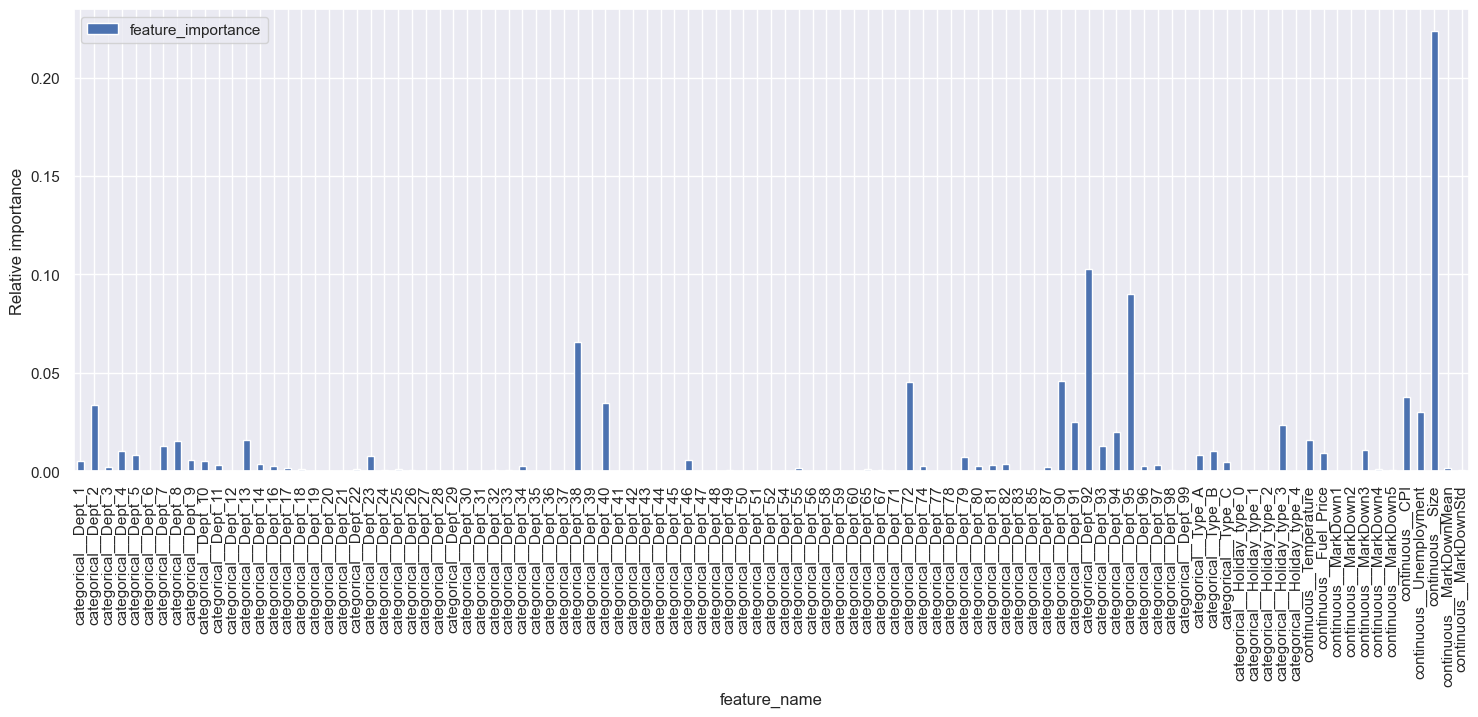

In [16]:
fig, axes = create_feature_importance_plot(opt.best_estimator_)